# Itinerary Datasets

In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import practicum_utils as utils

In [55]:
files = utils.get_loggi_files()
files

['../data/supply/availability_dist1_ano.csv',
 '../data/supply/availability_dist2_ano.csv',
 '../data/supply/itinerary_dist1_ano.csv',
 '../data/supply/itinerary_dist2_ano.csv']

# Itinerary Drivers Dataset 1

In [56]:
df = pd.read_csv(files[2])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20991 entries, 0 to 20990
Data columns (total 25 columns):
Unnamed: 0              20991 non-null int64
itinerary_id            20991 non-null object
driver_id               18284 non-null object
created                 20991 non-null object
accepted                18284 non-null object
dropped                 1578 non-null object
started                 18133 non-null object
finished                19002 non-null object
status                  20991 non-null object
total_distance          20991 non-null int64
transport_type          20991 non-null object
product                 20991 non-null object
product_version         20991 non-null object
distribution_center1    20991 non-null int64
packages                18150 non-null float64
delivered_packages      18150 non-null float64
checked_in_at           18069 non-null object
pickup_checkout_at      17910 non-null object
pickup_lat              20723 non-null float64
pickup_lng        

,Unnamed: 0,itinerary_id,driver_id,created,accepted,dropped,started,finished,status,total_distance,...,delivered_packages,checked_in_at,pickup_checkout_at,pickup_lat,pickup_lng,real_completion_time,pickup_distance,pickup_time,check_in_time,waypoints
0,0,59bf54f6d9bf16ab8c76578f8b03e8bb,5e506cfcfb7cd4d3181b6abba4c76456,19-12-19 09:00,19-12-19 09:05,NaN,19-12-19 09:05,19-12-19 11:16,finished,43434,...,5.0,19-12-19 09:43,19-12-19 09:45,-23.467847,-46.512231,7833.0,5837,1.933333,142.1000,11
1,1,9b9a4cad11ae393b832277b447f1a968,8d29dd0def2357eff973b20241ee8e4f,19-10-14 07:30,19-10-14 07:31,NaN,19-10-14 07:31,19-10-14 08:50,finished,32207,...,9.0,19-10-14 07:32,19-10-14 07:35,-23.467853,-46.512247,4764.0,1524,3.666667,179.0666,14
2,2,542d9fe1c00d45cb1e450adfea35521f,a26395e55f7dfbe49c6154b9984f259f,19-10-10 15:13,19-10-10 15:16,NaN,19-10-10 15:16,19-10-10 15:59,finished,18853,...,1.0,19-10-10 15:17,19-10-10 15:22,-23.467844,-46.512233,2598.0,18853,5.350000,179.5833,2
3,3,9881771a89ba0ea95eef7130598aea25,fe0ebd7aa7e18d71b961a0ccbb8d6319,19-11-01 09:13,19-11-01 09:14,NaN,19-11-01 09:14,19-11-01 12:04,finished,31535,...,9.0,19-11-01 10:05,19-11-01 10:15,-23.467831,-46.512223,10211.0,14281,9.850000,129.6000,10
4,4,a50ada6f391a4fcacdfc7072653f078f,f4e0f38852ef321b7989a87a9639e419,19-11-06 06:10,19-11-06 06:14,NaN,19-11-06 06:14,19-11-06 08:51,finished,74262,...,9.0,19-11-06 06:45,19-11-06 07:13,-23.467841,-46.512218,9413.0,16668,27.916667,149.3666,13


In [57]:
df.nunique()

Unnamed: 0              20991
itinerary_id            20991
driver_id                1610
created                 13085
accepted                13739
dropped                   948
started                 13621
finished                16306
status                      9
total_distance          17603
transport_type              2
product                     1
product_version             2
distribution_center1        1
packages                   46
delivered_packages         46
checked_in_at           14528
pickup_checkout_at      15259
pickup_lat              20723
pickup_lng              20723
real_completion_time    11188
pickup_distance          8430
pickup_time              2220
check_in_time            4113
waypoints                  48
dtype: int64

In [58]:
df.isnull().sum()

Unnamed: 0                  0
itinerary_id                0
driver_id                2707
created                     0
accepted                 2707
dropped                 19413
started                  2858
finished                 1989
status                      0
total_distance              0
transport_type              0
product                     0
product_version             0
distribution_center1        0
packages                 2841
delivered_packages       2841
checked_in_at            2922
pickup_checkout_at       3081
pickup_lat                268
pickup_lng                268
real_completion_time     3052
pickup_distance             0
pickup_time              3091
check_in_time            2939
waypoints                   0
dtype: int64

In [59]:
date_columns = ['created', 'accepted', 'dropped', 'started', 'finished', 'checked_in_at', 'pickup_checkout_at']
for col in date_columns:
    print('to_datetime({})...'.format(col))
    df[col] = pd.to_datetime(df[col], format='%y-%m-%d %H:%M')    

to_datetime(created)...
to_datetime(accepted)...
to_datetime(dropped)...
to_datetime(started)...
to_datetime(finished)...
to_datetime(checked_in_at)...
to_datetime(pickup_checkout_at)...


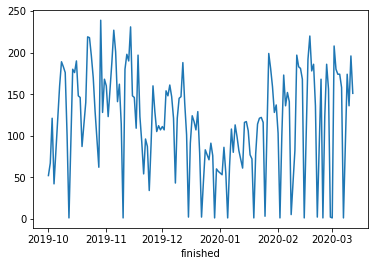

In [60]:
df[(df.status == 'finished')].groupby(df['finished'].dt.date)['itinerary_id'].count().plot();

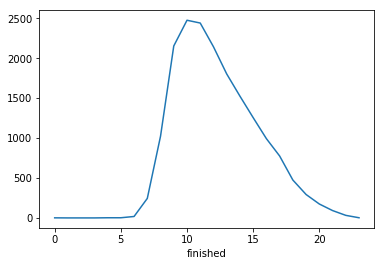

In [61]:
df[(df.status == 'finished')].groupby(df['finished'].dt.hour)['itinerary_id'].count().plot();

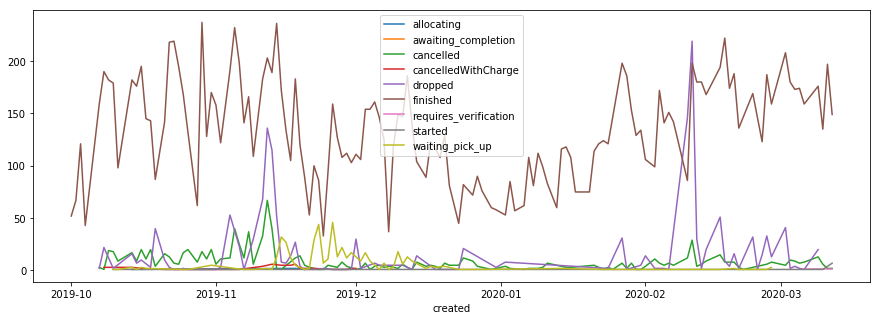

In [62]:
fig, ax = plt.subplots(figsize=(15,5))
for s, g in df[(df.created.notnull()) & (df.status.notnull())].groupby('status'):
    g.groupby(g.created.dt.date).itinerary_id.count().plot(ax=ax, label=s)
plt.legend();

In [63]:
df.groupby('driver_id').itinerary_id.count().sort_values(ascending=False)

driver_id
abae2bc074c8b4af3a7272b12ba66510    190
fae272b321c99415bc913513053c5fd2    187
ca2bdbb2d3b802403205f9d619cc3834    183
4416d590c9179a08081ba762d365b799    178
4a4fc0609d5e034e8e35adf86ed4df9b    176
70da22cedcdbf9dd9edc943555fe8d69    168
878f28b136310cacb1405a26a29afaf5    167
f8c29b91056a6707a9a5f7da97729ca8    161
ffdb5ceab0617e621e87d6169c0c3806    152
921f42a2ec2769c7f100eaea88c8bf8b    140
2703d69a0f5745bbe6da23540f25bb58    139
cfbbc8c980cd11be81c0494c49585ded    132
8d29dd0def2357eff973b20241ee8e4f    122
3e3511413cb9400415a443c601898794    121
ec0853f47dd0830c015e3545bad02634    117
f4e9599e0b69aaa87e0f7e61da54ba9a    113
4de7610a1f1e06a48aec54c9fd3b2f78    107
ef977169cdbaf051d5eb5e7b8a76e9e1    105
63240353f8a8790dbe8f7bd93b014c1a    100
b309ef30894b74083754313fb7e7dc09     98
3f93fc8157ef88249242af2924e005b2     96
b86500780b87a752f7e4dfdbbd47c26a     95
56ec0546ba108088f40777a86248d309     94
db77344648f5fb5fbbbe9011b5ded4d0     93
1aa1b3a1b47a9ad59df75317f89352

In [64]:
df.groupby('driver_id').itinerary_id.count().describe()

count    1610.000000
mean       11.356522
std        22.160825
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max       190.000000
Name: itinerary_id, dtype: float64

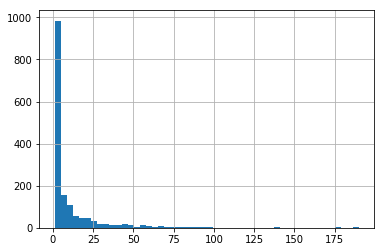

In [65]:
df.groupby('driver_id').itinerary_id.count().hist(bins=50)

In [89]:
#df.groupby('driver_id').itinerary_id.apply(lambda x: x.count() if x.count() < 33 else np.nan).reset_index(name='count')
df.groupby('driver_id').itinerary_id.count()

driver_id
0046f76358739fbd984b7d7d5aadd845      4
0052e0a5b243cb0855827577443dcf97     64
00745ea188d28f5e383123ca2e4459d2      2
00bf731677e64a1d2070c52fc97d3908      1
0100aa06c9be0a9c6f80647bcda96585      1
01232e4ce9f3e3f5f60570187a3f612e      2
012dac816e7966ff4a35e1d76e5e2b2a      1
016a3432421d8db5f205fc4d2b850243     26
017072208129b0da692d8e9e90641cb7     34
01788bf6c7a271a78202e93a3d90aa46      1
017e6c3df5f18e211b0c7cadd149e1c0      1
01a38d58132dd9a032c8b4195658b9ed      2
01bbec0778d530a5b75b9ec9782947a5      6
01c7a52dc9b63db1917dac035d24ebab     23
01cada52115c239d356b49be802c37d4      1
01db7402920281fb3efab5978a3d401f      1
01f1d7223963fc5c0e6817a1d2516ee4      4
0210bc8545fc0c796315722768a2d98b      1
0237e3fc730282fd48eb4345a4269308     10
0281341f125d2fa0667fdf231696e294      9
029e405ad68045a8c66cd2706d277c29      1
02daccce7b45910db43b4c83845e7959      1
03c85ce82febe2cbc45a639ae8a1432a     34
03d0dc4c5a2e1724af89123ec8bbe9c2     10
03d9b1b76a435bf49beadb649a70a3

In [100]:
df.groupby('driver_id').itinerary_id.count().lt(33).reset_index(name='1std')

,driver_id,1std
0,0046f76358739fbd984b7d7d5aadd845,True
1,0052e0a5b243cb0855827577443dcf97,False
2,00745ea188d28f5e383123ca2e4459d2,True
3,00bf731677e64a1d2070c52fc97d3908,True
4,0100aa06c9be0a9c6f80647bcda96585,True
5,01232e4ce9f3e3f5f60570187a3f612e,True
6,012dac816e7966ff4a35e1d76e5e2b2a,True
7,016a3432421d8db5f205fc4d2b850243,True
8,017072208129b0da692d8e9e90641cb7,False
9,01788bf6c7a271a78202e93a3d90aa46,True
